# Flux Computational Workshop 17 September 2021
## Computational modeling of goal-directed and habitual reinforcement-learning strategies

Claire Smid<sup>1</sup> and Wouter Kool<sup>2</sup><br>
<sub><sup>1</sup> University College London<br>
<sup>2</sup> Washington University in St. Louis<br></sub>

**Useful references:**

Free lecture series from David Silver on reinforcement learning: https://www.youtube.com/watch?v=2pWv7GOvuf0

- Sutton and Barto 2nd edition: http://incompleteideas.net/book/the-book-2nd.html
- Drummond, N., & Niv, Y. (2020). Model-based decision making and model-free learning. _Current Biology, 30,_ R860-R865.
- Daw, N. D., Gershman, S. J., Seymour, B., Dayan, P., & Dolan, R. J. (2011). Model-based influences on humans' choices and striatal prediction errors. _Neuron, 69,_ 1204-1215.
- Doll, B. B., Duncan, K. D., Simon, D. A., Shohamy, D., & Daw, N. D. (2015). Model-based choices involve prospective neural activity. _Nature Neuroscience, 18,_ 767-772.
- Kool, W., Cushman, F. A., & Gershman, S. J. (2016). When does model-based control pay off? _PLoS Computational Biology, 12,_ e1005090.
- Decker, J. H., Otto, A. R., Daw, N. D., & Hartley, C. A. (2016). From creatures of habit to goal-directed learners: Tracking the developmental emergence of model-based reinforcement learning. _Psychological Science, 27,_ 848-858.

### Goal of this workshop

In this workshop, you are going to explore a computational model that makes decisions using two distinct reinforcement-learning strategies.

The first of these is very much like the reinforcement-learning model that you heard about during the first session of today's workshop: it is an agent that learns the value of actions in the environment solely by observing their associated _rewards_ and _punishments_. This strategy, which resembles Skinner's operant conditioning principles, is extremely efficient and has virtually no deliberation by the agent. It simply repeats what worked in the past, and avoids what did not. We think of this type of decision making as more-or-less *habitual*.

However, humans, and other animals, often make more sophisticated decisions, using the structure of the environment to their advantage. This was shown famously by Edward Tolman. He trained mice to find a reward in a simple maze, always starting them from the same location. Of course, these mice quickly found the most efficient way to the reward. This result is, of course, easily explainable with operant conditioning. However, when Tolman placed his rats in another arm of the maze, he found that they were still very good at walking towards the rewarded location. This suggests that the rats formed a _cognitive map_ of the task, an internal representation of the structure of the maze, and that they used this to plan towards their goal. This type of decision making can be thought of as *goal-directed* or *deliberative*.

Humans also form cognitive maps of their environment, and they use these to plan towards their goals. Some of these cognitive maps can be of actual physical space (such as when planning your route home), but cognitive maps can be very abstract as well (for example, of your social network!).

<mark>Can you think of a real-life scenario in which you rely more on habit, and one in which you use more goal-directed planning?
<br>

In this workshop, we will extend the lessons from the first session to build models that use both habitual and goal-directed decision-making strategies. You are going to do this in the context of a variant (Kool et al. 2016, Doll et al. 2015) of a popular sequential decision-making task (one where participants make multiple decisions as they navigate through the environment to achieve a reward, (Daw et al. 2011)). We are going to (1) simulate and inspect behavior of the computational model, and (2) use model-fitting techniques to fit data to the task.

We hope that these lessons inspire you to start using computational models in your own work! Mathematical descriptions of computational models can be daunting to the untrained eye. By letting you play around with the models, and by providing a scaffold from which to work, we aspire to show you that most of the computational models that psychologists use are fairly simple and that you can leverage their precision to gain a mathematically precise peak under the mind's hood.

## Notation and some words of advice

This workshop, like all computer code, works from top to the bottom. We will use plain text (like this) to inform you about aspects of the task, computational models, and model-fitting techniques. Often, we will provide you with some unfinished code, and it will be your task to complete it. Because we have limited time, you will not write all of the code. Instead, we are going to focus your attention on the parts of the model that we think is most important for your understanding of how to use reinforcement learning to study human behavior.
<br>

<mark> When we have an assignment for you, we will print it in yellow. Like this. You have already seen an example of this in the paragraph above.</mark>

We will also provide **Hints** for you in bold, that can give you some pointers of how to approach a problem.

We have tried our best to structure the coding assignments so that you start with very small tasks, and then work your way to a real, working, simulation of how humans might perform in a psychological experiment. Please don't hesitate to let Claire or Wouter know when you are stuck, or if something is unclear. It is our goal to make this workshop publicly available, and your experience will be extremely helpful in us making this the best possible learning experience.

### Overview
The workshop contains three sections. In the first (this notebook), you will learn about the task, some of the basic building blocks of reinforcement-learning models, and you will simulate behavior of an agent that acts purely with the habitual decision-making strategy. In the second, you will add the goal-directed decision-making strategy to this code, and you will learn how let the agent act according to a _mixture_ of these two 'systems'. In the third section, we will teach you how to fit the model's parameters to data.

This workshops will require you to code. We encourage you to play around with the code. Create a new cell to see what certain lines of code produce, try to figure out how important functions work, and mess around with parameter values! Getting your hands dirty will really help you truly understand the computational models described in this workshop.

### Jupyter Notebook/Google Colab shortcuts 
This workshop is coded using Python. You can edit it and run the code using either **Jupyter Notebook** or **Google Colab**. Jupyter Notebook can be easily installed using Anaconda: https://www.anaconda.com/. Google Colab: https://colab.research.google.com/ is easily accessible from your browser, and has the benefit that all packages will be available to you directly. However, you can only have 5 Google Colab notebooks running at a time, while this is unlimited for Jupyter Notebook. Both are freely accessible! 

Just to get you started:

- Press shift + enter to go through each cell and run the code that is in it
- Whenever you see a # in front of a line of code, this means that the following text are just comments and not actual code
- If you see a * like In[*] to the left of the cell, it means the cell is still running
- In the top right of the screen you can see what language you're coding in (it should say Python 3)
- The number inside the In[] bracket shows when you ran this cell last (e.g. if it says In[1], this is the first cell you've ran (the order doesn't really matter, you can rerun cells as often as you like. This just shows you in which order the cells were run.
- If there are any kind of functions in the cells, you need to run the cell before you can use it in the rest of the notebook

If you want to learn more shortcuts for navigating Jupyter Notebook/Google Colab, here is a useful link: https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330

**Important:** If you do not understand a piece of code, you should _definitely_ create a new cell somewhere in this Notebook. (+ sign in the top) and copy the code and run it individually. This a perfect way to gain insight into how lines of code work. It will allow you to mess around and <code>print</code> the output of variables without the risk of ruining your prior work. We do this all the time.

# Section 1: the paradigm, value-based choice, and model-free reinforcement learning
## The two-step task
We are going to simulate reinforcement-learning perform a variant of popular paradigm known as the 'two-step' task. In this task, participants have to make repeated decisions in order to receive a reward. To make the task more fun for our participants, we have embedded the task in a space travel setting! On each trial of the task participants choose one spaceship from a pair of spaceships. The chosen spaceship then takes the participant to either a red or a purple planet. There they encounter an alien. If the participant interacts with the alien, there is chance that they will receive a reward in the form of space treasure!

Specifically, there are two pairs of spaceships that each appear in their own 'first-stage' state. For each pair, one spaceship will always transition to the red planet, and the other always to the purple planet. Below is a schematic of this structure, in _cursive_ are the variables we will use to keep track of the different states (s1 and s2) and values for actions (Qmf1 and Qmf2):

![Task_structure](https://drive.google.com/uc?export=view&id=1IHQ7adLC9cg7wfEBlZNTd3QYWVIdVmBA)

_Stimuli adapted from Decker et al. 2016_

So each trial starts with seeing one of the two pairs of spaceships (either in the top left or top right panel). In each pair, participant have the opportunity to go to the red or the purple planet. The dark blue and orange spaceships always travel to the red planet, while the green and light blue spaceship always go to the purple planet.

After selecting an alien, the participant either recieves a reward or it does not. This is determined by the current _reward probability_ of each alien. If this probability is high, the alien is likely to deliver a reward, if it is low, the alien is unlikely to deliver a reward. For each of the two aliens, this reward probability changes over time, independently from the other alien's reward probability. This means that participants need to continually learn which planet has the best alien! You can see an example of reward probabilities for each alien across 200 trials of the task. Note that the reward probabilities 'drift' between 0% and 100%.

![Reward_probabilities](https://drive.google.com/uc?export=view&id=1D0y2rQ7kTWDMQ3N0V4b6QWl_nMFJFS5e)

## Two reinforcement-learning strategies

The neat thing about the two-step task is that it lets researchers dissociate between more habitual and more goal-directed decision-making strategies. We can do so by using tools from reinforcement learning. Specifically, a wealth of research over the last decade suggests that these forms of decision making are described well by ***model-free*** and ***model-based*** reinforcement learning, respectively (for a short introductory piece, see Drummond & Niv, 2020).

### Model-free reinforcement learning
A model-free decision maker simply associates the actions it took with the rewards they yielded. It increases the likelihood of choosing actions that led to reward, and decreases the likelihood of choosing actions that led to no reward. In other words, it performs trial-and-error learning. In the two-step task above, this has some interesting implications for how a model-free learner chooses its actions based on what happened on the previous trial.

For example, imagine that a trial starts with the  spaceship pair on the top left in the image above, and that the agent chooses the dark blue spaceship. Therefore, they will transition to red planet. Now let's say that here they receive a reward. The question is how this affects their choice on the next trial. It turns out that this completely depends on which first-stage 'starting state' they encounter on this next trial. There are two possibilities: either they start in the same (top-left) state, or in the other (top-right) state (this is randomly chosen). If the model-free agent starts in the same state as on the previous trial, they will see the same dark-blue spaceship again. Because they have associated the dark-blue spaceship with the reward on the previous trial, the model-free agent will  be more likely to choose this spaceship again! However, if the model-free agent starts in the other starting state, the action chosen on the previous trial (the dark blue spaceship) is not available (you can verify this in the figure above). The outcomes on the previous trial did not involve any of the currently available actions. Therefore, the outcomes on the previous trial do not affect the choices on the current trial.

In short, model-free learners do not generalize experiences between starting states. Because model-free learners simply repeat what worked before, and avoid what didn't, anything learned from one starting state only affects their choice in that same starting state.

### Model-based reinforcement learning
Goal-directed control can be modeled using model-based reinforcement learning. The key characteristic of a model-based decision maker is that they use the structure of the environment to _plan towards goals_. In other words, they use their knowledge of how the spaceships transition to planets to infer the expected value of each spaceship. You can think of this in terms of generalization: a model-based learner will view the dark blue and orange spaceships as the same option, and the green and light blue as the same too, because these spaceships lead towards the same planets!

Therefore, a model-based agent evaluates each spaceship in terms of its consequences, and therefore it is able to transfer experiences obtained after one pair of spaceships to the other pair. In the example above this would mean that a model-based agent would not only be more likely to choose the dark-blue spaceship in the same starting state, but also the orange spaceship in the other.

### Plotting the behavior of model-based and model-free agents.

In the figure below, we have plotted the behavioral profiles of a model-free (left panel) and a model-based agent (right panel). These graphs depict the probability that the agent revisits the same planet as on the previous trial ('stay' probability) as a function of (1) whether or not a reward was received on that trial and (2) whether the starting state is the same as on the previous trial. As you can see, the model-based agent is unaffected by which first-stage state it encounters (right panel). It simply chooses to go to a planet if it earned reward there on the previous trial, regardless of whether the starting state is the same. The model-free learner, on the other hand, is only more likely to revisit the same second-stage state if it encounters the same pair of spaceships.

![Doll_Stay_Prob_Plots](https://drive.google.com/uc?export=view&id=12yCxmaMjuTsOCG7gZjrrEIsPN-xCMlTr)

_Edited from Doll et al. 2015_

<mark>It is crucial that you understand the logic of this figure. If anything is unclear, don't hesitate to let Claire or Wouter know.</mark>

Humans typically display a _mixture_ of these two strategies, as you can see in the figure below. That is, it looks like they are using both model-based and model-free control. Using reinforcement-learning techniques we can figure out how much model-based control each participant uses on this task. That's awesome, because it let's us use precise mathematics to measure a core aspect of human behavior -- how much deliberation and planning is used during decision making.

![Doll_Human_Prob_Plots](https://drive.google.com/uc?export=view&id=1QjYcScXGgMq1OzpFjpGPXVOW9EPOohgv)

_Edited from Doll et al. (2015)_

In this workbook we are going to take our first steps towards that. We are going to write some code that implements a model-free learner on this task. With this, we will aim to replicate the left panel of this figure.

## Simulating behavior on the two-step task

Finally! We can start looking at some code. First, we are going to import some 'packages' that we will use, including Numpy and Matplotlib. Simply hit shift-enter in the following cell to run the code.

In [1]:
# first, we'll import some packages that we'll use

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


### Step 1. Creating the drifting reward probabilities
The first thing we will do is to create a _function_ that generates some drifting reward probabilities. For now, we have written this code for you, but please do inspect the code below. This function generates reward probabilities according to a random Gaussian walk. As you can see, the function takes input parameters that dictate the number of trials (<code>n_trials</code>), the upper and lower bounds for the probabilities (<code>bounds</code>), the reward probabilities at which each alien starts (<code>init_vals</code>), and how quickly the reward probabilities change from trial to trial (<code>drift_rate</code>). The function returns an array with reward probabilities for each state and trial number (<code>reward_probs</code>).

You will have to run the cell below to make this function available to this Python notebook, but you will not have to change it.

In [2]:
# Create drifting reward probabilities 
def generate_rewards(n_trials, bounds, init_vals, drift_rate):
    
    # we can set the same random seed so we get the same random values
    random.seed(2)

    # pre-allocate the rest
    reward_probs = np.ones((n_trials, 2)) * 0.5

    # To start with, we initialise one planet lower than the other
    reward_probs[0,:] = random.sample( init_vals, len(init_vals))

    # next, we loop through the trials, and add Gaussian noise to each planet's reward probability for each trial separately
    for t in np.arange(n_trials-1)+1:

        for state in range(2):

            upd = np.random.normal(0, drift_rate) # random Gaussian noise
            
            reward_probs[t, state] = reward_probs[t-1, state] + upd
            
            # reflecting bounds
            reward_probs[t, state] = min(reward_probs[t, state],max(bounds[1]*2-reward_probs[t, state],bounds[0]))
            reward_probs[t, state] = max(reward_probs[t, state],min(bounds[0]*2-reward_probs[t, state],bounds[1]))
            
    return reward_probs

In the cell below, we run this function with a particular set of input parameter values. Specifically, we tell it to generate reward probabilities for 200 trials, with bounds of 0 and 1, starting points at 0.4 and 0.6, and with a 'drift rate' of 0.2. Next, we plot the reward probabilities across trials. _Note that because these reward probabilities are randomly generated, they will change everytime you run the above code._ You can play with the different values of the input parameters to see how these affect the reward probabilities.


<mark>Try to understand how the value of the drift rate parameter changes the reward probabilities!

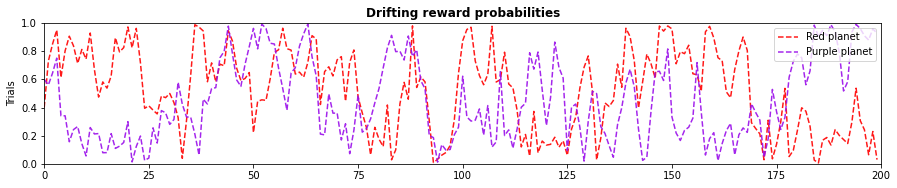

In [3]:
## Generate reward probabilities:
n_trials = 200
bounds = [0, 1]
init_vals = [0.4, 0.6]
drift_rate = 0.2 # play around with this value!

reward_probs = generate_rewards(n_trials,bounds,init_vals,drift_rate)

## Make plot:
# Define plot sizes
ax = plt.subplots(figsize=(15, 4), facecolor='w')
ax = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=2)

# Overlay reward values
ax.plot(reward_probs[:, 0], color='#FF0000', alpha=0.9, linestyle='--', label='Red planet')
ax.plot(reward_probs[:, 1], color='#9A0EEA', alpha=0.9, linestyle='--', label='Purple planet')
ax.set_ylabel('Probability of reward')
ax.set_ylabel('Trials')
ax.set_title(r'Drifting reward probabilities', fontweight='bold')
ax.set_ylim(0, 1)
ax.set_xlim(0, n_trials)
ax.legend(loc=1)
plt.show()

### Step 2. Choice and update results
Great! We have a function that gives us reward probabilities that our model-free learner will try to estimate and use to obtain rewards!. Now, we will work towards implementing this model-free reinforcement learner. First, _you_ will write two functions that are going to be very helpful with this enterprise. The first is the _softmax decision rule_, which helps us translate learned values of available actions into choice probabilities! Then, we will talk a little bit about how model-free reinforcement learning updates action values, and implement some code that performs this update according to the _temporal difference update rule_.

#### The softmax decision rule
In order to make a choice, our reinforcement learner needs to be able to translate values of actions into action probabilities. We are going to do this using the softmax rule, which was talked about in today's first session. This rule computes the probability of an action by weighing its value against all other values: if an agent values a particular action highly compared to the other actions, it will be more likely to select that action. In math, this rule can be written as:

$\Large p(a') = \frac{e^{\beta Q(a')}}{\sum_j{e^{\beta Q(a_{j})}}}$

with $a'$(a-prime) being the probability of the future action, $Q(a)$ the estimated value of action $a$ and $\beta\geq0$ an inverse temperature parameter. This latter parameter determines the agent's explore/exploit tradeoff. If $\beta$ is large, the agent exploits, and is more likely to choose what it thinks is the best possible option. If its value is closer to 0, then the agent is more likely to explore, and choose more randomly between actions.

The way to read this function is to see it as a way to reflect some transformation of the propotion of _value_ that $a'$ has over all available value. If this value is much higher than all other actions, than this proportion approaches 1, if it is much lower than all other actions, this proportion approaches 0.

To see this, you are going write the softmax function. What we want is a function that returns the choice probabilities for each available action. The function accepts an array with Q-values, and an inverse temperature parameter value.



<mark>Finish the softmax formula in the cell below. After that, you can use the next cell with code test your function.


In [4]:
# def softmax(Q,beta): 
#     p = # calculate the reward probabities
#     return p # here we return the computed reward probabilities

# hint: you should us np.exp, and np.sum. You can multiply numpy arrays with a scalar  using *, 
# and you can divide numbers using /
# Google things you do not understand! Or ask us!

# To be removed:
def softmax(Q, beta):
    p =  np.exp(beta*Q) / np.sum(np.exp(beta*Q))
    return p
    

You can test your softmax function in the cell below. For your convenience, we have provided an array with two action (or Q-) values of (0.6 and 0.3). You can think of these as estimated reward probabilities that the agent expects after choosing that action. Note that the probabilities returned by <code>softmax</code> should sum to one (i.e., all possible choices should be accounted for). Think about how the inverse temperature ($\beta$) should change these values, and verify this with the code below.

In [5]:
# test your softmax
Q_example = np.array([0.6, 0.3])
beta = 2 # play with this value, and see how this affects choices probabilities
softmax(Q_example,beta)

array([0.64565631, 0.35434369])

For a more in-depth inspection of how the inverse temperature ($\beta$) influences choice behavior, you can test your softmax function further in the block of code below. This will plot full choice curves for five different $\beta$ values. The x-axis in this plot shows the difference in value between two available actions A and B. So, on the right side of each plot, $Q(A)$ is much larger than $Q(B)$ and on the left $Q(B)$ is much larger than $Q(A)$. 


<mark>Think about how this should translate into the probability of selecting option A, which is plotted on the y-axis. Do your curves make sense? What should happen when the difference in values becomes larger? What should happen when the inverse temperature ($\beta$) becomes larger? Predict what you think you should see, and then test this using the code below. (There is no need to change the code below.)

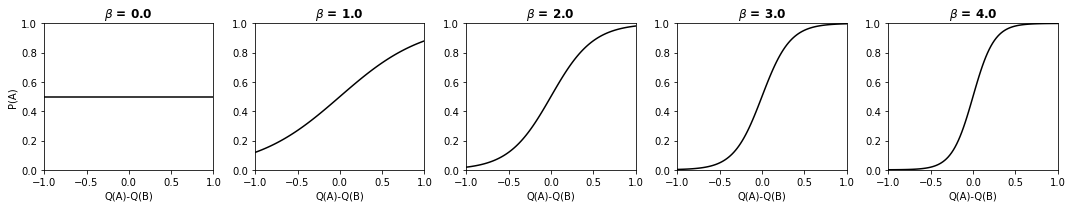

In [6]:
# The following line picks 5 values regularly spaced between 0 and 4
_betas = np.linspace(0.0, 4, 5)

fig, axs = plt.subplots(1, _betas.size, figsize=(_betas.size*3, 3))

for beta, ax in zip(_betas, axs):
    x = np.linspace(-1, 1, 100)
    p = np.zeros(x.size)
    for i in range(x.size):
        p[i] = softmax(np.array([0.5+x[i], 0.5-x[i]]), beta)[0]
    ax.plot(x, p, color='k')
    ax.set_ylim(0, 1)
    ax.set_xlim(-1, 1)
    ax.set_xlabel('Q(A)-Q(B)')
    ax.set_title(r'$\beta$ = ' + str(np.around(beta, 2)), fontweight='bold')
    
axs[0].set_ylabel('P(A)')
plt.tight_layout()

Awesome! If this is the only thing you do today, you have already learned a LOT. Softmax is the most widely used choice rule in computational psychology, so kudos to you. However, there is so much more ground to cover, so let's hurry along.

#### The temporal difference updating rule

As you learned in the previous session, reinforcement-learning agents update their estimates of how good actions are (Q-values) after they observe what kind of outcomes these actions yield. _They do so after each choice._ In model-free reinforcement-learning, an agent figures out how much to update a given action value after choosing it by computing a _reward prediction error_. The reward prediction is the difference between what the agent expected to happen (i.e., the Q-value of the chosen action), and what actually occurred. This latter component consists of (1) the actual, immediate, reward the agent earns ($r$), and (2) how much reward it estimates to receive in the future ($Q'$). So the prediction error can be written as:

$\Large PE = (r + Q') - Q(a_{chosen})$

Note that the terms in the brackets on the left represents what was _observed_ and the right term represents what was _expected_. So this difference represents some form of surprise! It then uses this prediction error to update the value of the chosen action, but only by a small amount. This small amount is also know as the _learning rate_ ($\alpha$). It dictates how much of the PE gets added to the current Q-value of the chosen action:

$\Large Q(a_{chosen}) \leftarrow Q(a_{chosen})+\alpha PE$

Now, you are going to write this temporal difference rule in a new function below. The function accepts a learning rate (<code>alpha</code>), the Q-value of the chosen action (<code>Q_chosen</code>), and the prediction error (<code>PE</code>). It then spits out an updated version of the Q-value of the chosen action (<code>Q_chosen_updated</code>). 


<mark>Finish the temporal difference updating rule below. Again, we have provided a cell for you below this one for you to test this function.


In [7]:
# def td_rule(alpha, Q_chosen, PE):
#     Q_chosen_updated = # and then use to compute the Q-value
#     return Q_chosen_updated

# To be removed:
def td_rule(alpha, Q_chosen, PE):
    Q_chosen_updated = Q_chosen + alpha * PE
    return Q_chosen_updated


You can test your temporal difference updating rule in the cell below. For your convenience, we have provided a learning rate (0.1), a chosen Q value (0.4), a Q_prime value (0), a reward (1). Note that Q_prime = 0, which reflects the state at the end of each trial (when there no more steps or future states to visit; see below for more detail).

Use this to test your function. What happens when the learning rate is very low? What happens when the learning rate is very high? What does this mean in psychological terms?

In [8]:
# try out the temporal difference updating rule below
alpha = 0.01
Q_chosen = 0.4
Q_prime = 0
r = 0.1

PE = r + Q_prime - Q_chosen

td_rule(alpha, Q_chosen, PE)

0.397

#### A note about the number of updates in the two-step task

The two-step task consists of, uhh, two 'steps'. The first occurs after a spaceship is chosen and the planet is visited. The second step occurs after the alien gets selected, and the reward is observed. Reinforcement-learning agents update their values after each step, and so in this task they compute two prediction errors (<code>pe_1</code> and <code>pe_2</code>).

For the first prediction error, after the spaceship choice, the immediate reward is zero ($r=0$). After all, no reward is observed after this choice. However, there is some estimate of _future_ reward as given by the estimated reward probability of the encountered alien.

For the second prediction error, the reward is identical to whatever was observed (either 1 or 0, depending on what the alien delivers). Here, because there are no more future states in the trial, the estimate of future reward (<code>Q_prime</code>) is zero. 

In short: the updates happening in the task are actually not that complex (it's true!), both of them effectively contain two terms. You need to keep this in mind when you complete the script below. Among other things, you will write code that computes prediction errors for each trial, and use these in your temporal difference update function (<code>td_rule</code>).

We realize it is a little bit counterintuitive to think that the agent _chooses_ an alien after transitioning to the planet. After all, there is only one alien per second-stage state (planet). However, it is important for the model to compute two separate prediction errors, for reasons we will see in the next second part of the workshop.


#### Some extensions of reinforcement-learning that we will not be considering here

In reinforcement learning, prediction errors on a trial are important not just for the current trial and action, but they are actually used to update all previous actions too. Often, computational models attenuate the degree to which prior actions are updated by the current prediction with a 'eligbility trace decay' parameter $\lambda$ (lambda) (between 0 and 1). (There's no need to remember this term now). In short, the longer ago an action took place, the less it is affected by the current prediction error (it is discounted by $\lambda^t$, with _t_ the number of steps ago).

Computer scientists also often discount expected future reward with the use of a discounting parameter $\gamma$ (gamma). That is, when computing the prediction error, they multiply the expectation of future reward by this parameter. From a psychologists perspective, this makes a lot of sense! We know that humans engage in temporal discounting.

Today, however, we will keep things simple, and we will not either $\gamma$ or $\lambda$. We will not discount the expectation of future reward, and all actions that happened before the prediction error was computed will be updated in the same way. (So, on each trial this means that after the first prediction error one action value is updated, and after the second two prediction errors are updated.)

If you are interested in learning more about this, you can read a nice short explanation of all these concepts here: https://medium.com/@violante.andre/simple-reinforcement-learning-temporal-difference-learning-e883ea0d65b0

### Step 3. Simulating model-free behavior on the two-step task
We finally know enough now to start building our simulation of the model-free agent! Hurray!

In the section below, you can use your knowledge about the temporal difference updating rule and the softmax function to complete the model-free agent's code. The final code will simulate behaviour of a model-free agent on the task, which we can then plot afterwards and compare to our plots above.

Several lines of code are already complete, but there are many (very important) lines of code for you to finish. Whenever we expect you to finish a line of code, we will make this explicitly clear with a commented bit of text (e.g., # complete this line). The comments also provide some hints, or tell you what different lines of codes do.

You can use this image to help you understand how to fill out values for the model below:

![Task_structure](https://drive.google.com/uc?export=view&id=1u9dbdI6QIsF9ns3nIjRPfZXJwy-0-xMS)


Some things to keep in mind:
- You will need to use the softmax function
- You will need to use the temporal difference updating rule
- You should think about how a model-free learner updates the values of each spaceship in the first-stage (what are r, Q_chosen and the prediction error?)
- You should think about how it updates the values of each alien (what are r, Q_chosen, and the prediction error?)

<mark>Finish the code below. As before, we have provided a few If you get stuck at any point, do let Claire and Wouter know!</mark>

**Hint**: Where you need to complete a line we have left this comment:
_#--- Fill this in_

In [9]:
# we will use a for loop, and generate choices for the agent as they go through the trials and learn from rewards
random.seed(2) # fixing the random seed so we can generate similar values

def model_free_agent(n_trials, alpha, beta):
    
    # we can set the same random seed so we get the same random values
    random.seed(2)
    
    # We'll use your generate_rewards function to generate drifting reward probabilities
    bounds = [0, 1]
    init_vals = [0.4, 0.6]
    drift_rate = 0.2
    reward_probs = generate_rewards(n_trials, bounds, init_vals, drift_rate)
        
    # Pre-allocate empty arrays for storing data
    prev_rews = np.zeros(n_trials) # This will store the rewards won on the previous trial
    first_stage_state = np.zeros(n_trials) # ... which spaceship pair the participants saw (0 or 1)
    state_sim = np.zeros(n_trials) # ... whether participants saw the same spaceship pair as on the previous trial, or the other one 
    choices = np.zeros(n_trials) # ... which spaceship the participants chose
    second_stage_state = np.zeros(n_trials) # ... which planet the participants transitioned to
    stay = np.zeros(n_trials) # ... whether participants visited the same planet as on the previous trial
    rewards = np.zeros(n_trials) # ... how many rewards the participants won on this trial

    # We initialise model-free values for the spaceships (all 0.5)
    Qmf1 = np.zeros((2,2)) + 0.5 # this will create an array inside an array (4 values, you can print them below to see)
    
    # and for the planets
    Qmf2 = np.full(2, 0.5)
    
    # Now, we loop through the trials, making choices, observing outcomes, and updating action values
    for i, reward_prob in enumerate(reward_probs): # for each iteration of this loop, the current trial is indexed by i

        # We randomly start with spaceship pair 1 (0) or pair 2 (1)
        s1 = np.random.choice([0, 1])
        
        # Compute the action probabilities for both spaceships (left: 0, right: 1). The Q-values of the current first-stage state are stored in Qmf1[s1]
        p = softmax(Qmf1[s1], beta)                                        #--- Fill this in

        # Make a 'weighted' choice using the np.random.uniform function and the variable p (you can use help(function) 
        # to find out more). In other words, choose the left spaceship (choice==0) with probability p[0] 
        # and the right (choice==1) with probability p[1]
        # You will need to write your code inside the brackets of the int() function, because otherwise Python will complain.
        choice = int(np.random.uniform(0,1) > p[0])                        #--- Fill this in
        
        # Make the transition to the planet. Take a look at the diagram above. Think about which choices go which second-stage states.
        # This line of code should be _very_ simple.
        s2 = choice                          #--- Fill this in

        # Calculate the first prediction error (no reward here (r==0), why?). The value of the chosen first-stage state is stored in Qmf1[s1,choice].
        pe_1 = Qmf2[s2] - Qmf1[s1,choice]                                  #--- Fill this in
        
        # Update the Q-value of the chosen spaceship in the starting state
        Qmf1[s1,choice] = td_rule(alpha, Qmf1[s1,choice], pe_1)            #--- Fill this in
        
        # Use np.random.uniform to determine whether the agent receives a reward (1 or 0, depending on the reward probability).
        # Note that you will have to use i and s2 to retrieve the current reward probability.
        # Again, You will need to write your code inside the brackets of the int() function.
        r = int(np.random.uniform(0,1) < reward_probs[i,s2])               #--- Fill this in
        
        # Calculate the second prediction error. Again, note that there is a reward value here, but no future reward.
        pe_2 = r - Qmf2[s2]                                                #--- Fill this in
        
        # Update the Q-value of the visited alien (stored in Qmf2) using pe_2
        Qmf2[s2] = td_rule(alpha, Qmf2[s2], pe_2)                          #--- Fill this in
        
        # Use pe_2 to also update the Q-value of the chosen spaceship in the starting state
        Qmf1[s1,choice] = td_rule(alpha, Qmf1[s1,choice], pe_2)            #--- Fill this in

        # save data from this trial to our pre-allocated arrays
        rewards[i] = r
        first_stage_state[i] = s1 # we log these so we can check the state similarity
        second_stage_state[i] = s2 # we log these so we can check if participants 'stayed' or 'switched'
        
        # these are based on the previous trial (i-1)
        if i != 0: # start at second trial (first trial this is set to 0)
            # whether they transitioned to the same planet on this trial
            if s2 == second_stage_state[i-1]:
                stay[i] = 1
            # whether they saw the same spaceship pair on this trial
            if s1 == first_stage_state[i-1]:
                state_sim[i] = 1
            # whether they received a reward on the previous trial
            prev_rews[i] = rewards[i-1]
        
        # you can uncomment the lines below to see what happens each trial in printed form.
        # note that if you uncomment these, the figure in the cell below will print all the way 
        # at the bottom of the printed statements (just comment the lines out again to see figure immediately)
        
#         ###  comment code between this this out or in (shortcut = ctrl + /)
        
#        # print spaceship choice and which pair was seen 
#        # spaceship chosen
#         if choice == 0:
#             position = 'left'
#         else:
#             position = 'right'
            
#         print(f'trial: {i+1}, spaceship pair: {s1+1}, spaceship chosen: {position}')
              
#         # print which planet was transitioned to
#         if s2 == 0:
#             color = 'red'
#         else:
#             color = 'purple'

#         print(f'transitioned to {color} planet, first prediction error: {pe_1}')
#         print(f'stay: {bool(stay[i])}, agent received: {r}')
#         print(f'{color} planet prediction error: {pe_2}')
#         print(f'Model-free q-values for all spaceships:\n[1:left, 1:right,\n2:left, 2:right]\n{Qmf1}')
#         print(f'Model-free q-values for planets [red, purple]: {Qmf2}\n')
        
#          ###  comment code between this out or in

        
    # data returned by function
    return stay, state_sim, prev_rews, rewards



#### Testing the model-free learner

In the cell below, you can run the model-free function that you are writing, and you can see if it runs without any errors. If you do run into errors, try to see if you can decipher what might be going wrong from the outputs (and Google). If you get stuck, do ask Claire or Wouter for help with your code. 

Note that the code running without any errors does not mean that your code is doing what you _want_ it do. Your code does not know your intentions, and will blissfully execute your commands. There are many ways in which you can write wrong code, without this notebook giving you an error message.

To debug your code, try printing the different choices that the simulated agent makes, and the Q-values for each choice. Are they updating as expected? At the end of the function above, we have provide useful print statements that we commented out. You can uncomment these, and use them to view the output of each trial consecutively to see how things change. 

Note that you will need to rerun the cell above after any change you make before the code below reflects these changes.

In [10]:
# initialise values
n_trials = 200
alpha = 0.5
beta = 4

# run an agent
[stay, state_sim, prev_rews, rewards] = model_free_agent(n_trials, alpha, beta)

You can run the code below to plot simulated behaviour from your code.

If you see errors, then it is most likely that you some mistakes in your code above. Read the error messages and try to assess what you need to change. If the code below produces a plot, this means that your code ran without throwing error. However, your code not crashing is not a good indication that it works _as intended_.

Therefore, you should check whether your plot resembles that of a model-free learner (figure presented for reference below). If it does not, you will need to dig into your <code>model_free_agent</code> code. Often this is the hardest part. You will have to use critical reasoning skills, and experimentation to determine what goes wrong. You can use the commented out bits of code at the end of function to get more fine-grained insight into how actions are updated from trial to trial.

If the plots look alike, a great way to test it a few more times is to increase the number of trials. This is because the more trials the agent completes the less "noisy" the plot will be. You will notice that the plots are quite variable with just 200 trials, but very stable with 20000.

**Hint**: run the cell below a few times, to get a better feel of what kind of behavior we are generating!

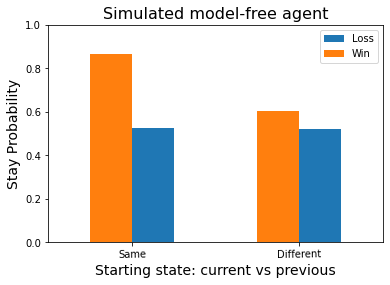

In [11]:
# Run an agent and plot the data (Note: you can run this cell over and over again)
n_trials = 20000
alpha = 0.5
beta = 4

[stay, state_sim, prev_rews, rewards] = model_free_agent(n_trials, alpha, beta)

# calculate group scores
df = pd.DataFrame({"Spaceship_State_Sim":state_sim,"Previous_Rewards":prev_rews,"Stay":stay})
plot_data = df.groupby(["Spaceship_State_Sim","Previous_Rewards"]).mean().unstack()
a = plot_data.reset_index()

# plot the graph
fig, ax = plt.subplots()
a.plot(x = "Spaceship_State_Sim", kind="bar", ylim = [0,1],
       stacked=False,ax=ax)

ax.legend(["Loss","Win"])
ax.set_ylabel("Stay Probability", size = 14)
plt.xticks(rotation=1)
ax.set_xticklabels(['Different','Same'])
ax.set_xlabel("Starting state: current vs previous", size = 14)
ax.invert_xaxis()
plt.title('Simulated model-free agent', size = 16)
plt.show()

#### Let's compare these to the model-free stay probabilities from before:

![](https://drive.google.com/uc?export=view&id=1DAk_SjyqMAT9r53EvMT4Eltx9_yCji4q) <br>

Does your model-free agent behave similarly to what is depicted in this plot? Can you identify the similarities in behaviour after winning or losing on a trial, depending on whether the starting state is the same as on the previous trial? Does your agent do the 'right' thing? (Note that the limits on the y-axes are different between these figures!)

### Performance 

So, how well does the model-free agent perform this task? One way to quantify this is to calculate on what percentage of the trials the agent won a reward. The code below will compute this for you. How well does your model-free agent perform? 

Note that if your agent wins less than or roughly equal to 50% of all trials, it's not performing better than chance. (You would expect the same performance if we chose based on coin flips). Let's how well your agent did with <code>alpha = 0.5</code> and <code>beta = 4</code>. When we performed this analysis, and we let the model-free agent perform a ton of trials (say 20,000), the agent won on between 52.5% and 55% of all trials. Not great, but better than chance! If you agent does not score more than 50% most the time, there might be something wrong with your code.

In [12]:
# every time you run this cell, it will simulate a new agent with the settings below. You will see the percentage of trials, every time you will see a percentage

n_trials = 20000
alpha = 0.5
beta = 4

[stay, state_sim, prev_rews, rewards] = model_free_agent(n_trials, alpha, beta)

# calculate and print performance
print(f'They won on: {sum(rewards)*100 / n_trials}% of the trials')


They won on: 54.71% of the trials


# A decision for you!
Congrats! You made it to the end of the 'regular' part of this first section. Below you will find extra assignments that dive a bit deeper into how well your model performes. If you have ample time, feel free to play around with them. However, the model-based agent is just around the corner, in Section 2. Up to you!

### Extra assigment 1: Finding the best model and most profitable task    
If you have time, you can try to answer these additional questions:
1. Investigate how beta and alpha value influence the percentage of trials with a reward. Is a high or low learning rate ideal? And a high or low beta?

2. Investigate whether it matters how quickly the reward probabilities change from trial to trial. If the drift rate is high, would you want a high or a low learning rate? Generate some hypotheses, and try to test them with the code. (Think about where you would alter the drift rate of the reward probabilities)

### Extra assignment 2: Tracking the reward probabilities
Another way to look at the performance of the model is to see how well the Q-values track the reward probilities. After all, the model-free agent is simply trying to estimate how good each option is. The better its estimates are, the better its choices become.

Let's see how well your model does. To do this, you are going to rewrite the model-free agent function below. This will essentially be the same function, except that we are now returning some new variables:

- The Q-values of the alients (planets) for each trial in an array called <code>Qs</code>. 
- The true reward probabilities (<code>reward_probs</code>)
- The choices the agent makes on each trial (<code>choices</code>)

We can use almost exactly the same function as above. All you need to change is to save the variables mentioned above. You don't need to think hard about this part!

You should pre-allocate the variables and then add values to them for every trial. Think about what shapes the variables should take (e.g. how many choices per trial? how many Q-values for each alien per trial?). Hint: you can access a horizontal slice in an array with <code>Qs[:,i]</code>.

You can find the code to generate the plots that show how well the Q-values track the reward probabilities below this cell, so you can look at the real choices your agent made over the trials, and how well they tracked the values of the planets over time!

In [13]:
def model_free_agent_Qs(n_trials, alpha, beta):
    
    # we can set the same random seed so we get the same random values
    random.seed(2)
    
    # We'll use your generate_rewards function to generate drifting reward probabilities
    bounds = [0, 1]
    init_vals = [0.4, 0.6]
    drift_rate = 0.2
    reward_probs = generate_rewards(n_trials, bounds, init_vals, drift_rate)
    
    # Pre-allocate empty arrays for the data
    
    choices = np.zeros(n_trials) # which spaceship the participants chose
    rewards = np.zeros(n_trials) # how many rewards the participants won on this trial
    Qs = np.zeros((2, n_trials)) # what the Q-values are on each trial               #--- Fill this in
    
    # Initialise model-free values for the spaceships
    Qmf1 = np.zeros((2,2)) + 0.5 # this will create an array inside an array (4 values, you can print them below to see)
    # and for the planets
    Qmf2 = np.full(2, 0.5)
    
    # Now, we loop through the trials, making choices
    for i, reward_prob in enumerate(reward_probs):

       # Randomly start in spaceship pair 1 (0) or pair 2 (1)
        s1 = np.random.choice([0, 1])
        
        # Agent makes a choice using softmax
        p = softmax(Qmf1[s1], beta)

        # Make a weighted choice using the np.random.choice function and the variable p (you can use help(function)
        # to find out more)
        choice = choices[i] = int(np.random.uniform(0,1) > p[0])
        
        # Make the transition to the planet
        s2 = choice # finish this line to transition to the right planet

        # Calculate first prediction error (no reward here (0))
        pe_1 = Qmf2[s2] - Qmf1[s1,choice]
        
        # update choice
        Qmf1[s1,choice] = td_rule(alpha, Qmf1[s1,choice], pe_1)
        
        # Agent receives a reward (1 or 0) (depending on reward probability)
        r = rewards[i] = int(np.random.uniform(0,1) < reward_probs[i,s2])
        
        # Calculate second prediction error (actual reward)
        pe_2 = r - Qmf2[s2]
        
        # update value of alien (planet)
        Qmf2[s2] = td_rule(alpha, Qmf2[s2], pe_2)
        
        # update value of choice (spaceship)
        Qmf1[s1,choice] = td_rule(alpha, Qmf1[s1,choice], pe_2) 
            
        # save q values
        # you need to save 2 q-values for every trial, which are the same q-values as for the second stage (alien/planet) 
        Qs[:,i] = Qmf2                                                               #--- Fill this in
        
        
    # data returned by function
    return choices, Qs, reward_probs

Below is the code that plots the Q-values of the model and the actual reward probabilities over time. 
    
<mark>We encourage you to play around with the learning rate and the inverse temperature to see how this affects how well the Q-values reflect the true reward probabilities. Can you relate this to your experimentation with the more blunt performance score above? How do you see which planet was visited on which trial?</mark>

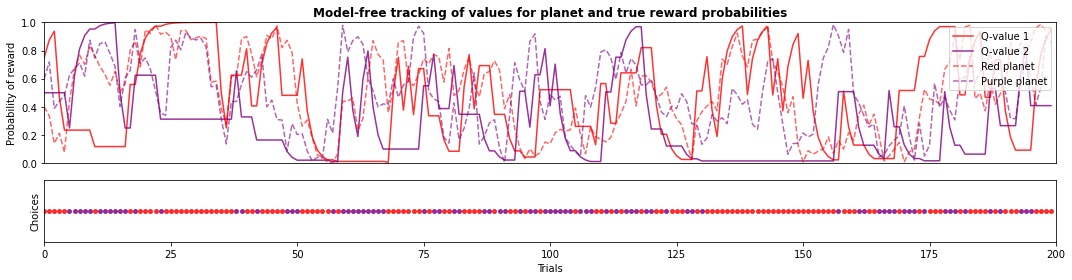

In [14]:
# we can plot how well this model did at tracking the highest probability of receiving a reward

# set values
n_trials = 200
alpha = 0.5
beta = 4

# run the agent
choices, Qs, reward_probs = model_free_agent_Qs(n_trials, alpha, beta)

colors = ['red','purple']

# Define plot sizes
fig, ax = plt.subplots(figsize=(15, 4), facecolor='w')
ax = plt.subplot2grid((3, 1), (0, 0), colspan=1, rowspan=2)

# plot the Q-values
for i, (i, color) in enumerate(zip(range(2), colors)):
    ax.plot(np.arange(n_trials), Qs[i, :], alpha = 0.8, label = 'Q-value ' + str(i+1), color = color)
    
# defining some plot stuff
ax.set_ylim(0, 1)
ax.set_xlim(0, n_trials)
ax.set_xticks([]) # don't show xticks for this plot
ax.set_ylabel('Q-values')
ax.legend()

# Overlay reward values
for i, (i, color) in enumerate(zip(range(2), colors)):
    if i == 0:
        label_ = 'Red planet'
    else:
        label_ = 'Purple planet'
                
    ax.plot(np.arange(n_trials), reward_probs[:,i], alpha = 0.6, linestyle = '--', label = label_, color = color)
    

# adding some labels and legends
ax.set_ylabel('Probability of reward')
ax.set_title(r'Model-free tracking of values for planet and true reward probabilities', fontweight='bold')
ax.legend(loc=1)

# plot the choices the agent made (either red or purple planet)
ax = plt.subplot2grid((3, 1), (2, 0), colspan=1, rowspan=1)
for i, choice in enumerate(choices):
    ax.scatter(i, 0, color=colors[int(choice)], s=15, alpha = 0.8)
    
# defining some plot stuff
ax.set_xlim(0, n_trials)
ax.set_yticks([]) # no y-ticks for this plot
ax.set_xlabel('Trials')
ax.set_ylabel('Choices')
plt.tight_layout()

### Well done! You have finished the extra assignments for this step, amazing work!

Now, you can head over to the script for Step 2, where we will add a parameter to this model that allows us to generate both model-free and model-based behavior on the task!
